# Vyhodnocení gama analýzy

Načteme knihovny, které se v analýze dat v Pythonu používají téměř vždy:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [4]:
import sys
sys.path.append(r"D:\thesis\model\python_lib")  #
%load_ext autoreload
%autoreload 2
import os

data_dir = r"."
os.environ["LGK_DATA_PREFIX"] = data_dir

In [5]:
import gamma
import dose
import data

Podobným způsobem načteme data z Leksell GammaPlanu. Vybíráme si data z algoritmu **Convolution**.

Následně spočítáme matice s gama indexem.

In [61]:
gammas = {}

# Příprava výstupního souboru
import os
output_path = "data/gamma.h5"
os.remove(output_path)

with h5py.File(output_path) as hf:
    for study in ["gel", "adenoma", "neuralgia"]:
        mc = dose.get_dose(study, "mc")[1:-1,1:-1,1:-1]     # Ignoruj body na kraji
        mc2 = dose.zoom2_array(mc)                          # Interpoluj na dvojnásobné rozlišení    

        d = dose.get_dose(study, "convolution")[1:-1,1:-1,1:-1]
        d2 = dose.zoom2_array(d)
        dta = 2 / data.targets[study].grid 

        # Spočítej gama
        study_gamma = gamma.gamma_matrix(core(mc2, 40), core(d2, 40), dta=dta, dd=0.03)
        hf["convolution-%s" % study] = study_gamma
        gammas[study] = study_gamma

In [62]:
gammas["gel"].shape   # Jak vypadá matice

(40L, 40L, 40L)

## Grafické zobrazení v (skoro)prostřední axiální rovině

### Gelový fantom

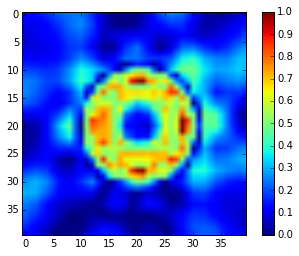

In [63]:
fig = plt.imshow(gammas["gel"][:,:,20], vmin=0, vmax=1.0)
plt.colorbar();

### Neuralgie

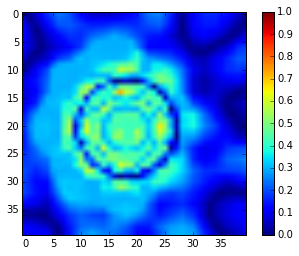

In [67]:
fig = plt.imshow(gammas["neuralgia"][:,:,20], vmin=0, vmax=1.0)
plt.colorbar();

### Adenoma

<matplotlib.colorbar.Colorbar instance at 0x000000001FF9B9C8>

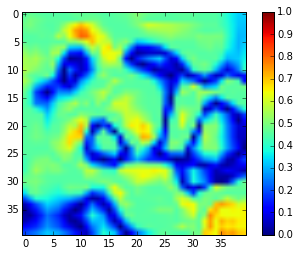

In [66]:
plt.imshow(gammas["adenoma"][:,:,20], vmin=0, vmax=1.0)
plt.colorbar()